## Initial analysis on the data to see what I have to work with and what data I would like to get

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from datetime import datetime

In [22]:
file_path = '../data/all_data.csv'
data = pd.read_csv(file_path)
data.head()

,artists,duration_ms_x,explicit,id_x,name,popularity,search_query,acousticness,analysis_url,danceability,...,mode_confidence,num_samples,offset_seconds,sample_md5,start_of_fade_out,tempo_y,tempo_confidence,time_signature_y,time_signature_confidence,window_seconds
0,"2 Chainz, Travis Scott",255560.0,True,1nX9KhK3Fff27SnrIor2Yb,4 AM,72.0,2 chainz 4 am,0.1180,https://api.spotify.com/v1/audio-analysis/1nX9...,0.796,...,0.516,5635098,0,NaN,252.70857,75.012,0.580,4,1.000,0
1,"2 Chainz, Ty Dolla $ign, Trey Songz, Jhene Aiko",210200.0,True,6H0AwSQ20mo62jGlPGB8S6,It's A Vibe,76.0,2 chainz it's a vibe,0.0317,https://api.spotify.com/v1/audio-analysis/6H0A...,0.822,...,0.436,4634910,0,NaN,198.87891,73.003,0.297,4,1.000,0
2,"2 Chainz, YG, Offset",234666.0,True,365wwIjijQdlRJEjUWTidq,PROUD,61.0,2 chainz proud,0.7380,https://api.spotify.com/v1/audio-analysis/365w...,0.781,...,0.499,5174400,0,NaN,230.01687,173.949,0.578,4,1.000,0
3,"2 Chainz, Drake, Quavo",225893.0,True,5S1IUPueD0xE0vj4zU3nSf,Bigger Than You (feat. Drake & Quavo),75.0,"2 chainz, drake bigger > you",0.2470,https://api.spotify.com/v1/audio-analysis/5S1I...,0.888,...,0.700,4980948,0,NaN,221.88408,141.009,0.753,4,0.971,0
4,21 Savage,220306.0,True,2fQrGHiQOvpL9UgPvtYy6G,Bank Account,83.0,21 savage bank account,0.0151,https://api.spotify.com/v1/audio-analysis/2fQr...,0.884,...,0.570,4857762,0,NaN,216.70603,75.016,0.841,4,1.000,0


## Need to do some EDA
1. What is the distribution of songs
2. who are the most popular and who are the least popular artists
3. what currently is the most correlated with the number of weeks a song is in the billboards
    - hey have i considered the time that the song has been released? because it doesnt give new songs that chance to have the same amount of time as older songs!!!!!

In [23]:
data.columns

Index(['artists', 'duration_ms_x', 'explicit', 'id_x', 'name', 'popularity',
       'search_query', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms_y', 'energy', 'id_y', 'instrumentalness', 'key_x',
       'liveness', 'loudness_x', 'mode_x', 'speechiness', 'tempo_x',
       'time_signature_x', 'track_href', 'type', 'uri', 'valence',
       'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'id', 'key_y', 'key_confidence', 'loudness_y',
       'mode_y', 'mode_confidence', 'num_samples', 'offset_seconds',
       'sample_md5', 'start_of_fade_out', 'tempo_y', 'tempo_confidence',
       'time_signature_y', 'time_signature_confidence', 'window_seconds'],
      dtype='object')

In [24]:
# seems like I have some repeat columns so I'm going to drop those

drop_repeats = [column for column in data.columns if '_y' in column]
# there is an extra id column so adding that to the list
drop_repeats.append('id')
drop_repeats
data.drop(drop_repeats, axis=1, inplace=True)
data.columns

Index(['artists', 'duration_ms_x', 'explicit', 'id_x', 'name', 'popularity',
       'search_query', 'acousticness', 'analysis_url', 'danceability',
       'energy', 'instrumentalness', 'key_x', 'liveness', 'loudness_x',
       'mode_x', 'speechiness', 'tempo_x', 'time_signature_x', 'track_href',
       'type', 'uri', 'valence', 'analysis_channels', 'analysis_sample_rate',
       'duration', 'end_of_fade_in', 'key_confidence', 'mode_confidence',
       'num_samples', 'offset_seconds', 'sample_md5', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'window_seconds'],
      dtype='object')

In [25]:
rename_columns = [column.replace('_x', '') for column in data.columns]

data.columns = rename_columns
# checking my work
data.columns

Index(['artists', 'duration_ms', 'explicit', 'id', 'name', 'popularity',
       'search_query', 'acousticness', 'analysis_url', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'key_confidence', 'mode_confidence', 'num_samples',
       'offset_seconds', 'sample_md5', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'window_seconds'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 36 columns):
artists                      822 non-null object
duration_ms                  822 non-null float64
explicit                     822 non-null bool
id                           822 non-null object
name                         822 non-null object
popularity                   822 non-null float64
search_query                 822 non-null object
acousticness                 822 non-null float64
analysis_url                 822 non-null object
danceability                 822 non-null float64
energy                       822 non-null float64
instrumentalness             822 non-null float64
key                          822 non-null int64
liveness                     822 non-null float64
loudness                     822 non-null float64
mode                         822 non-null int64
speechiness                  822 non-null float64
tempo                        822 non-null float64
time_si

In [27]:
# sample_md5 is missing values so I should drop that 

data.drop('sample_md5', axis=1, inplace=True)

In [28]:
data.head()

,artists,duration_ms,explicit,id,name,popularity,search_query,acousticness,analysis_url,danceability,...,duration,end_of_fade_in,key_confidence,mode_confidence,num_samples,offset_seconds,start_of_fade_out,tempo_confidence,time_signature_confidence,window_seconds
0,"2 Chainz, Travis Scott",255560.0,True,1nX9KhK3Fff27SnrIor2Yb,4 AM,72.0,2 chainz 4 am,0.1180,https://api.spotify.com/v1/audio-analysis/1nX9...,0.796,...,255.56000,0.00000,0.271,0.516,5635098,0,252.70857,0.580,1.000,0
1,"2 Chainz, Ty Dolla $ign, Trey Songz, Jhene Aiko",210200.0,True,6H0AwSQ20mo62jGlPGB8S6,It's A Vibe,76.0,2 chainz it's a vibe,0.0317,https://api.spotify.com/v1/audio-analysis/6H0A...,0.822,...,210.20000,0.00000,0.281,0.436,4634910,0,198.87891,0.297,1.000,0
2,"2 Chainz, YG, Offset",234666.0,True,365wwIjijQdlRJEjUWTidq,PROUD,61.0,2 chainz proud,0.7380,https://api.spotify.com/v1/audio-analysis/365w...,0.781,...,234.66667,0.08689,0.353,0.499,5174400,0,230.01687,0.578,1.000,0
3,"2 Chainz, Drake, Quavo",225893.0,True,5S1IUPueD0xE0vj4zU3nSf,Bigger Than You (feat. Drake & Quavo),75.0,"2 chainz, drake bigger > you",0.2470,https://api.spotify.com/v1/audio-analysis/5S1I...,0.888,...,225.89333,2.51356,0.802,0.700,4980948,0,221.88408,0.753,0.971,0
4,21 Savage,220306.0,True,2fQrGHiQOvpL9UgPvtYy6G,Bank Account,83.0,21 savage bank account,0.0151,https://api.spotify.com/v1/audio-analysis/2fQr...,0.884,...,220.30667,0.18658,0.393,0.570,4857762,0,216.70603,0.841,1.000,0


In [29]:
# i want to know what songs are missing so that i can manually get those since i want to get as much data as possible

data[data.explicit.isna()].to_csv('../data/missing_data_songs.csv', index=False)

## Cleaning Data:

Going through each of the columns, what is the best way to handle it

#### artists columns

In [30]:
data['artists'].fillna('missing', inplace=True)
artists_df = data['artists'].apply(lambda x: x.split(', '))

In [31]:
artists_df = pd.get_dummies(artists_df.apply(pd.Series).stack()).sum(level=0)

In [32]:
artists_df.sum().sort_values(ascending=False)

Drake               59
Migos               28
Future              26
Kendrick Lamar      23
Post Malone         23
Nicki Minaj         21
Travis Scott        18
Cardi B             18
Lil Uzi Vert        18
XXXTENTACION        17
The Weeknd          16
Ed Sheeran          15
Big Sean            15
21 Savage           14
Logic               13
Young Thug          13
Khalid              13
J. Cole             13
Gucci Mane          13
Kanye West          12
Kodak Black         12
Metro Boomin        11
Quavo               11
Chris Brown         10
Offset              10
Ty Dolla $ign       10
DJ Khaled            8
The Chainsmokers     8
Taylor Swift         8
Swae Lee             8
                    ..
Mitchell Hope        1
Moby                 1
Moneybagg Yo         1
Morgan Evans         1
Morgan Wallen        1
N.E.R.D              1
NERVO                1
Nas                  1
Nat King Cole        1
Nick Jonas           1
Meghan Trainor       1
Mason Ramsey         1
Lee Brice  

NTS: what does the evolution of Drake sound like (according to the data?)

#### explict
Python already knows that  true to 1 and false to 0

In [33]:
data.columns

Index(['artists', 'duration_ms', 'explicit', 'id', 'name', 'popularity',
       'search_query', 'acousticness', 'analysis_url', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'key_confidence', 'mode_confidence', 'num_samples',
       'offset_seconds', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'window_seconds'],
      dtype='object')

In [34]:
set(data['analysis_channels'].values) # that means i need to drop this column since it provides no signal

{1}

In [35]:
set(data['analysis_sample_rate'].values) # that means i need to drop this column since it provides no signal

{22050}

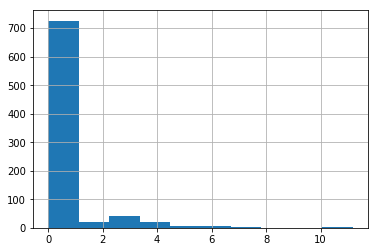

In [36]:
data['end_of_fade_in'].hist(); # what does this even mean though


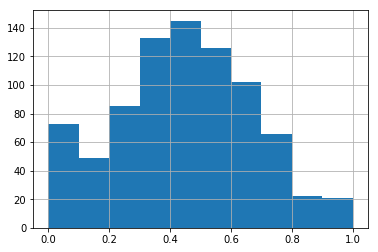

In [37]:
data['key_confidence'].hist() # what does this even mean

# i would like know the songs that have low confidence what do they have in common and i want to know
# why they have low confidence like whats wrong bb it ok!!

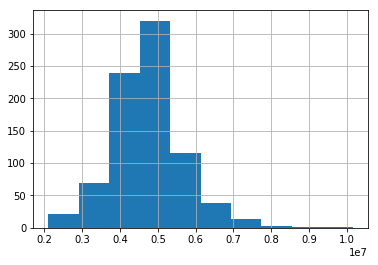

In [38]:
data['num_samples'].hist() # what does this mean

In [41]:
data.drop(['analysis_channels', 'analysis_sample_rate'], axis=1, inplace=True, errors='ignore')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 33 columns):
artists                      822 non-null object
duration_ms                  822 non-null float64
explicit                     822 non-null bool
id                           822 non-null object
name                         822 non-null object
popularity                   822 non-null float64
search_query                 822 non-null object
acousticness                 822 non-null float64
analysis_url                 822 non-null object
danceability                 822 non-null float64
energy                       822 non-null float64
instrumentalness             822 non-null float64
key                          822 non-null int64
liveness                     822 non-null float64
loudness                     822 non-null float64
mode                         822 non-null int64
speechiness                  822 non-null float64
tempo                        822 non-null float64
time_si

In [45]:
cleaned_filename = str(datetime.today().month).zfill(2) + '_' + str(datetime.today().day).zfill(2)
cleaned_filename

'04_27'

In [46]:
pickle.dump(data, open(f'../data/cleaned_data_{cleaned_filename}.pkl', 'wb'))

In [20]:
# pickle.dump(artists_df, open('../data/artists_df_dummied.pkl', 'wb'))